In [38]:
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd
import os
import cv2
import numpy as np
import h5py
import keras
from random import shuffle
from keras.layers import Dense, Dropout, Activation, Conv2D, Flatten, MaxPooling2D
from keras.models import Sequential
import face_recognition

IMG_SIZE=500

In [49]:
img_array=cv2.imread('training_images/gunjan_fake1.jpeg')
location = face_recognition.face_locations(img_array)
(T,R,B,L)=location[0]

206

In [50]:
# create image data only once by reading through cv2.imread, store it in .npy files

def create_training_data():
    train_path='training_images/*.jpeg'
    img_address=glob(train_path)
    training_data=[]
    for img_name in img_address:
        print(img_name)
        img_array=cv2.imread(img_name)
        location = face_recognition.face_locations(img_array)
        T,R,B,L=location[0]
        cropped_img= img_array[T:B, L:R]
        new_img_array=cv2.resize(cropped_img, (IMG_SIZE,IMG_SIZE))
        if 'real' in img_name: label=1
        else: label=0
        training_data.append([np.array(new_img_array),label])
    shuffle(training_data)
    np.save('train_data.npy', training_data)
    return training_data
# , interpolation = cv2.INTER_LINEAR

def create_testing_data():
    testing_data=[]
    test_path='test_images/*.jpeg'
    img_address=glob(test_path)
    for img_name in img_address:
        print(img_name)
        img_array= cv2.imread(img_name)
        location = face_recognition.face_locations(img_array)
        T,R,B,L=location[0]
        cropped_img= img_array[T:B, L:R]
        new_img_array= cv2.resize(cropped_img, (IMG_SIZE,IMG_SIZE))
        if 'real' in img_name: label=1
        else: label=0
        testing_data.append([np.array(new_img_array),label]) 
    np.save('test_data.npy', testing_data)
    return testing_data

train_data= create_training_data()
test_data= create_testing_data()

training_images/gunjan_fake1.jpeg
training_images/gunjan_fake2.jpeg
training_images/gunjan_fake3.jpeg
training_images/gunjan_fake4.jpeg
training_images/gunjan_fake5.jpeg
training_images/gunjan_fake6.jpeg
training_images/gunjan_fake7.jpeg
training_images/gunjan_real1.jpeg
training_images/gunjan_real2.jpeg
training_images/gunjan_real3.jpeg
training_images/gunjan_real4.jpeg
training_images/gunjan_real5.jpeg
training_images/gunjan_real6.jpeg
training_images/gunjan_real7.jpeg
training_images/kiran_fake1.jpeg
training_images/kiran_fake2.jpeg
training_images/kiran_fake3.jpeg
training_images/kiran_fake4.jpeg
training_images/kiran_real1.jpeg
training_images/kiran_real2.jpeg
training_images/kiran_real3.jpeg
training_images/kiran_real4.jpeg
training_images/meghna_real1.jpeg
test_images/gunjan_fake7.jpeg
test_images/gunjan_real1.jpeg
test_images/gunjan_real2.jpeg
test_images/kiran_fake4.jpeg
test_images/meghna_fake1.jpeg


In [51]:
# def create_training_data():
#     training_data=[]
#     IMG_SIZE=500
#     train_path='training_images'
#     for img_name in os.listdir(train_path):
        
#         img_array= cv2.imread(os.path.join(train_path, img_name))# convert image into an array and in grayscale
#         print(img_array)
# create_training_data()

## first oject of the array is giving None, dont know how to remove it,
## so instead of reading addresses through os, reading through glo.

In [52]:
train_data=np.load('train_data.npy')
test_data=np.load('test_data.npy')

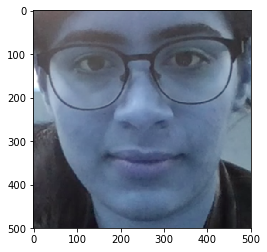

In [53]:
x_train= np.array([i[0] for i in train_data])
x_train=x_train/255.0
y_train= [i[1] for i in train_data]
x_test= np.array([i[0] for i in test_data])
x_test= x_test/255.0
y_test= [i[1] for i in test_data]
plt.imshow(x_train[0])
plt.show()

In [62]:
def cnn4(weights_path=None):
    model=Sequential()
    model.add(Conv2D(kernel_size=(3,3),filters=3,input_shape=(x_train.shape[1:]),activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(kernel_size=(3,3),filters=3,activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(kernel_size=(3,3),filters=10))
#     model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(kernel_size=(3,3),filters=10))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    model.add(Flatten())
    model.add(Dropout(0.3))
    model.add(Dense(1000,activation="sigmoid"))
    model.add(Dense(100,activation="sigmoid"))
    model.add(Dense(1,activation="sigmoid"))
#     model.summary()
    if weights_path:
        model.load_weights(weights_path)
    return model

In [63]:
model = cnn4()
# sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])
model.fit(x_train,y_train,validation_split=0.1, epochs=30)
model.save_weights('model_cnn4.h5')

Train on 20 samples, validate on 3 samples
Epoch 1/30
20/20 [==============================] - 5s 271ms/step - loss: 0.7204 - acc: 0.4500 - val_loss: 1.5566 - val_acc: 0.0000e+00
Epoch 2/30
20/20 [==============================] - 2s 100ms/step - loss: 0.8060 - acc: 0.5500 - val_loss: 0.9710 - val_acc: 0.0000e+00
Epoch 3/30
20/20 [==============================] - 2s 90ms/step - loss: 0.6290 - acc: 0.6000 - val_loss: 0.5102 - val_acc: 1.0000
Epoch 4/30
20/20 [==============================] - 2s 92ms/step - loss: 0.6409 - acc: 0.4500 - val_loss: 0.5310 - val_acc: 1.0000
Epoch 5/30
20/20 [==============================] - 2s 92ms/step - loss: 0.6104 - acc: 0.4500 - val_loss: 0.7926 - val_acc: 0.0000e+00
Epoch 6/30
20/20 [==============================] - 2s 94ms/step - loss: 0.5376 - acc: 0.8000 - val_loss: 1.1437 - val_acc: 0.0000e+00
Epoch 7/30
20/20 [==============================] - 2s 96ms/step - loss: 0.5312 - acc: 0.8000 - val_loss: 1.2874 - val_acc: 0.0000e+00
Epoch 8/30
20/20 [

In [64]:
probs= model.predict(x_test)
print(probs)
# The predicted probability is taken as the likelihood of the observation belonging to class 1

[[0.03510143]
 [0.9962287 ]
 [0.46567395]
 [0.10491991]
 [0.0392826 ]]


In [65]:
labels = (probs>0.5).astype(np.int)
print(labels)
print(y_test)

[[0]
 [1]
 [0]
 [0]
 [0]]
[0, 1, 1, 0, 0]
